# Demo Notebook 

Comparing linear regression model using scikit learn (benchmark model) and LinearModel module made from scratch, using only numpy library functions. Dataset used is a "Summary of Weather" dataset which tabulates daily weather data across the globe during World War 2, downloaded from kaggle https://www.kaggle.com/smid80/weatherww2.

The model will try to model a linear regression between _minimum temperature_ (independent variable) and _maximum temperature_ (dependent variable)

In [50]:
# import necessary library

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import LinearModel as lm
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Load the dataset

df_weather = pd.read_csv("./Summary of Weather.csv", low_memory=False)
df_weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Set MinTemp as independent variable, MaxTemp as dependent

X = np.array(df_weather['MinTemp']).reshape(-1, 1)
y = np.array(df_weather['MaxTemp'])

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=69)

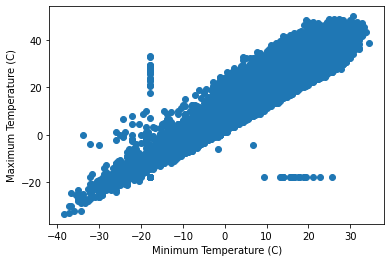

In [28]:
# simple visualisation of training data
plt.scatter(X_train, y_train)
plt.xlabel('Minimum Temperature (C)')
plt.ylabel('Maximum Temperature (C)')
plt.show()

## A. Modelling using scikit learn

In [53]:
# create the model using sklearn library
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients:  [0.91829118]
Intercept:  10.69534121127365
Mean squared error: 17.57
Coefficient of determination: 0.77


## B. Modelling Using Self Created Module

The module is designed to work in similiar fashion with standar scikit learn linear_model module. User can create an instance of Linear Regression object using LinearRegr class , and utilize fit and predict method to build a model from that instance and generate prediction. 

To use the module, simply copy the LinearModel folder onto current working directory, and import the module 

In [54]:
# first we import the module
import LinearModel

In [55]:
# then we create the model,
model = LinearModel.LinearRegr()

# fit our training data into the model,
model.fit(X_train, y_train)

# and make prediction 
model_pred = model.predict(X_test)

As part of model validation, several cost functions has been embedded into the LinearModel module, which can be generated by first instantiating a CostFunction class with parameters target data points (the ground truth) and predicted data points. The cost functions include mean squared error, absolute mean error, root mean square error and coefficient of determination (R^2) 

In [56]:
# create a cost function instance to calculate prediction errors and other cost functions
metrics = LinearModel.CostFunction(y_test, model_pred)

In [57]:
# get the model linear coefficient and intercept attributes
print('Coefficients: ', model.coef_) 
print('Intercept: ', model.intercept)

# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error())
print('Root mean squared error: %.2f'
      % metrics.root_mean_squared_error())

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % metrics.r_squared())
print('Mean absolute error: %.2f'
      % metrics.mean_absolute_error())


Coefficients:  [0.91829118]
Intercept:  10.695341211289623
Mean squared error: 17.57
Root mean squared error: 4.19
Coefficient of determination: 0.77
Mean absolute error: 3.22


### C. Regression Plot

Finally we can compare both regression model by plotting the resulted linear regression line side by side

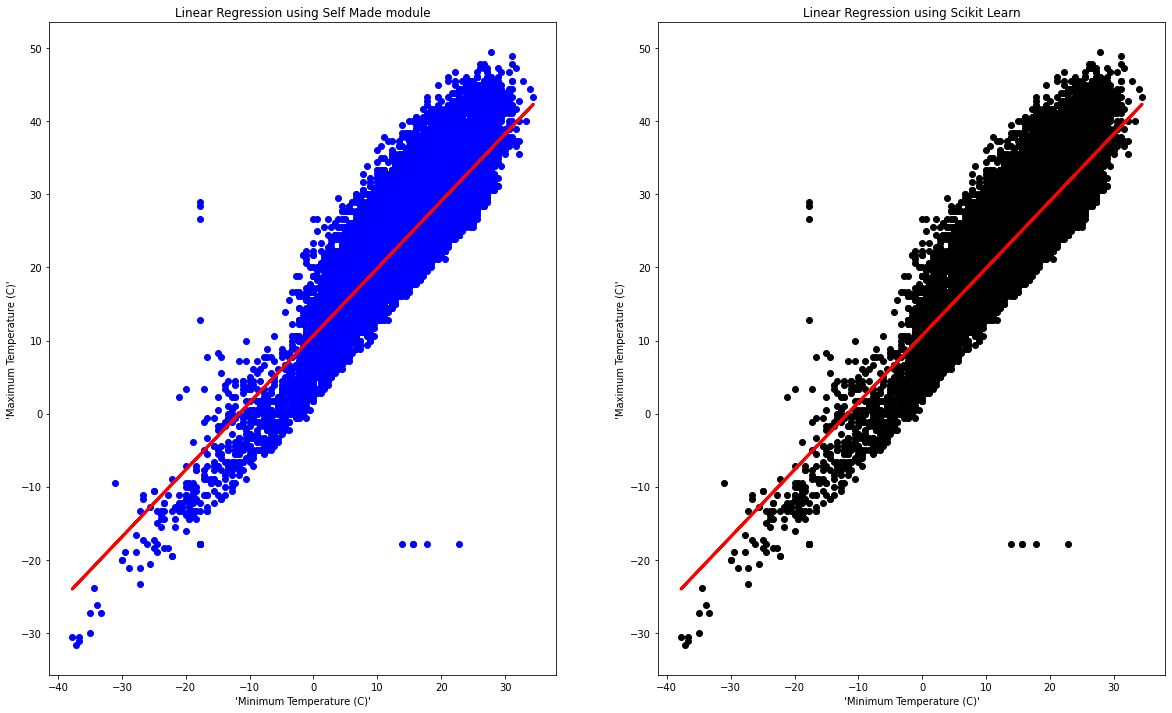

In [59]:
# Plot outputs
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,12))
ax1.scatter(X_test, y_test,  color='blue')
ax1.plot(X_test, model_pred, color='red', linewidth=3)
ax1.set_title("Linear Regression using Self Made module")
ax1.set_xlabel("'Minimum Temperature (C)'")
ax1.set_ylabel("'Maximum Temperature (C)'")

ax2.scatter(X_test, y_test,  color='black')
ax2.plot(X_test, y_pred, color='red', linewidth=3)
ax2.set_title("Linear Regression using Scikit Learn")
ax2.set_xlabel("'Minimum Temperature (C)'")
ax2.set_ylabel("'Maximum Temperature (C)'")

plt.show()